In [1]:
%run dataset_preparation.ipynb

DATASET PRONTO PARA USO!


dataset_preparation.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "cell_type": "markdown",


## Aplicando Decision Tree

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import r2_score

#pip install pydotpus
#pip install graphviz

# Seta um valor para o random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [13]:
#X_train_DC, X_test_DC, y_train_DC, y_test_DC = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED)


X_DT = result.loc[:, "Link 1"]
y_DT = result.loc[:, "Relevância"]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_DT)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [15]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_train_tfidf, y_DT, test_size=0.33, random_state=42)

In [16]:
dtc = DecisionTreeClassifier()

In [17]:
dtc.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_pred_DT = dtc.predict(X_test_DT)

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

score = precision_score(y_test_DT, y_pred_DT)

print("The model accuracy is: {0}".format(score))

The model accuracy is: 0.75


In [20]:
acc = accuracy_score(y_test_DT, y_pred_DT)
print(acc)

0.8110599078341014


In [21]:
#Resultados
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, recall_score

f1_score = f1_score(y_test_DT, y_pred_DT) * 100
recall_score = recall_score(y_test_DT, y_pred_DT) * 100
precisao_score = precision_score(y_test_DT, y_pred_DT)

print("O modelo Decision_Tree acertou {0}%".format("%.2f" % f1_score))
print("O modelo Decision_Tree acertou {0}%".format("%.2f" % recall_score))
print("The model accuracy is: {0}%".format("%.2f" % (precisao_score*100)))

O modelo Decision_Tree acertou 79.19%
O modelo Decision_Tree acertou 83.87%
The model accuracy is: 75.00%


In [22]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_DT, y_pred_DT)
print("Verdadeiro negativo: {0}".format(matrix[0][0]))
print("Falso positivo: {0}".format(matrix[0][1]))
print("Falso negativo: {0}".format(matrix[1][0]))
print("Verdadeiro positivo: {0}".format(matrix[1][1]))

Verdadeiro negativo: 98
Falso positivo: 26
Falso negativo: 15
Verdadeiro positivo: 78


In [23]:
# # Código para plotar o Decision Tree
# dot_data = StringIO()
# export_graphviz(dtc, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = X_DT, class_names=['0','1'])

In [24]:
# # Plota o Decision Tree
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('grafico.png')
# Image(graph.create_png())

[Text(291.0648648648649, 214.0425, 'X[812] <= 0.118\ngini = 0.497\nsamples = 438\nvalue = [202, 236]'),
 Text(259.3945945945946, 207.2475, 'X[1495] <= 0.036\ngini = 0.491\nsamples = 313\nvalue = [177, 136]'),
 Text(226.21621621621622, 200.4525, 'X[1168] <= 0.159\ngini = 0.465\nsamples = 247\nvalue = [156, 91]'),
 Text(208.11891891891895, 193.6575, 'X[1259] <= 0.104\ngini = 0.437\nsamples = 226\nvalue = [153, 73]'),
 Text(202.0864864864865, 186.8625, 'X[496] <= 0.088\ngini = 0.421\nsamples = 219\nvalue = [153, 66]'),
 Text(190.02162162162165, 180.0675, 'X[339] <= 0.111\ngini = 0.395\nsamples = 203\nvalue = [148, 55]'),
 Text(183.9891891891892, 173.2725, 'X[792] <= 0.115\ngini = 0.378\nsamples = 198\nvalue = [148, 50]'),
 Text(177.95675675675676, 166.4775, 'X[86] <= 0.299\ngini = 0.358\nsamples = 193\nvalue = [148, 45]'),
 Text(171.92432432432435, 159.6825, 'X[699] <= 0.139\ngini = 0.34\nsamples = 189\nvalue = [148, 41]'),
 Text(159.8594594594595, 152.8875, 'X[700] <= 0.117\ngini = 0.316

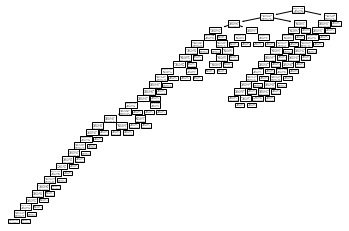

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


tree.plot_tree(dtc)

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

C:\Users\Lais Nascimento\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


InvocationException: GraphViz's executables not found